# Regresión logística sin librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
datos = pd.read_csv('reglog.csv')
datos.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Vamos a cuantificar la dimensión 'Gender' en ceros y unos

datos['Gender'] = datos['Gender'].map({'Male':0, 'Female':1})
datos.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


Podemos intuir que la variable a predecir es "Purchased", pues es binaria (0 o 1) y nos indica si el usuario realizó o no una compra con base en el resto de características

In [4]:
# Dividimos el conjunto de datos en las variables independientes y la dependiente
X = datos[['Gender', 'Age', 'EstimatedSalary']].values
Y = datos['Purchased'].values

In [5]:
# agregamos una columna de unos al principio del conjunto de datos de características 
# para que nos ayuden a multiplicar por uno el intercepto del  modelo y sumarlo a las
# demás características
# y normalizamos

X_media = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalizada = (X - X_media) / X_std

X_intercepto = np.hstack([np.ones((X_normalizada.shape[0], 1)), X_normalizada])



## 1. Creamos la función logística o sigmoide

In [6]:
# Creamos la función logística
funcion_sigmoide = lambda z : 1 / (1 + np.exp(-z))

##### El resultado es la probabilidad de que y = 1 dado X. 
##### Z es el producto entre los coeficientes del modelo y las características de una observación.

In [7]:
# Inicializamos los coeficientes del modelo en ceros:
coeficientes = np.zeros(X_intercepto.shape[1])

## 2. Creamos la función de costo
Esta función va a medir el rendimiento del modelo en términos de qué tan bien las probabilidades predichas coinciden con las clases reales.

La fórmula es:
<img src="costo.png" width="900"/>


In [8]:
# Creamos la función de costo
def funcion_costo(x,y,betas): # x
    m = len(y) # la longitud de 'y'
    
    # Se calcula la predicción para cada observación en el conjunto de datos
    predicciones = funcion_sigmoide(np.dot(x,betas))
    
    # se calculan todos los errores para cada observación de la dimensión 'y'
    error = -y*np.log(predicciones) + (1-y)*np.log(1-predicciones)
    
    # finalmente, se suman todos los errores y se dividen entre el total de datos
    JB = np.sum(error) / m
    
    return JB

## 3. Creamos la función de gradiente descendiente
Este método va a ayudarnos a optimizar, a través de la actualizacón de los parámetros del vector de coeficientes de manera iterativa con el objetivo de minimizar la función de costo.

Las funciones a utilizar son:

<img src="gradiente.png" width="400"/>
<img src="gradiente2.png" width="400"/>


Se entiende que Beta, o los coeficientes, se irán actualizando conforme el gradiente vaya descendiendo. 

In [9]:
def gradiente_desc(x, y, betas, alfa, iteraciones):
    m = len(y)
    costo_historico = []
    for i in range(iteraciones):
        # Calculamos sigmoide con los coeficientes en ceros para inicializar
        predicciones = funcion_sigmoide(np.dot(x, betas))
        
        # Realizamos la diferencia entre los valores predichos y valores reales de 'y'
        diferencia = predicciones - y
        
        # Hacemos el producto de X transpuesta por la diferencia y dividimos entre la cant de datos
        gradiente = np.dot(x.T, diferencia) / m
        
        # Finalmente, actualizamos los valores de los coeficientes Beta como se indica en la fórmula
        betas -= alfa * gradiente
            
        costo_historico.append(funcion_costo(x,y,betas))
        
    return betas

## 4. Comprobación:

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_intercepto, Y, test_size=0.2, random_state=42)

In [11]:
alfa = 0.01
iterac = 100000

coeficientes_optimos = gradiente_desc(x_train, y_train, coeficientes, alfa, iterac)
coeficientes_optimos

array([-1.1207235 , -0.15774554,  2.21191841,  1.22287573])

De acuerdo con el modelo, los coeficientes óptimos serían los mostrados arriba, comenzando por el intercepto, y los siguientes son los coeficientes para cada variable independiente.

In [12]:
def prediccion(x, betas):
    # Calcular la probabilidad con la función sigmoide aplicada al producto punto de x y betas
    probabilidad = funcion_sigmoide(np.dot(x, betas))
    # Inicializar un arreglo vacío para las predicciones
    predicciones = []
    # Agregar 1 al arreglo si la probabilidad es >= 0.5, sino agregar 0
    for p in probabilidad:
        if p >= 0.5:
            predicciones.append(1)
        else:
            predicciones.append(0)
    return predicciones
    
    

In [13]:
prediccion = prediccion(x_test, coeficientes_optimos)

In [14]:
prediccion[0:20]

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]

In [15]:
y_test[0:20]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [16]:
matriz_confusion = confusion_matrix(y_test, prediccion)
matriz_confusion

array([[50,  2],
       [ 7, 21]], dtype=int64)

In [17]:
import seaborn as sbn

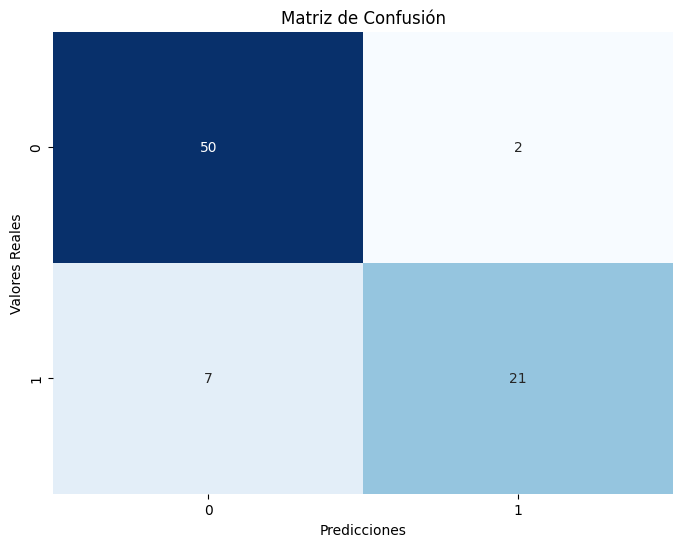

In [18]:
plt.figure(figsize=(8,6))
sbn.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Regresión logística con librerías

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clasificador = LogisticRegression()

In [21]:
clasificador.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_prediccion = clasificador.predict(x_test)
y_prediccion[:20]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [23]:
y_test[:20]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [24]:
clasificador.score(x_test, y_test)

0.8875

In [25]:
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test, prediccion)
matriz_confusion

array([[50,  2],
       [ 7, 21]], dtype=int64)

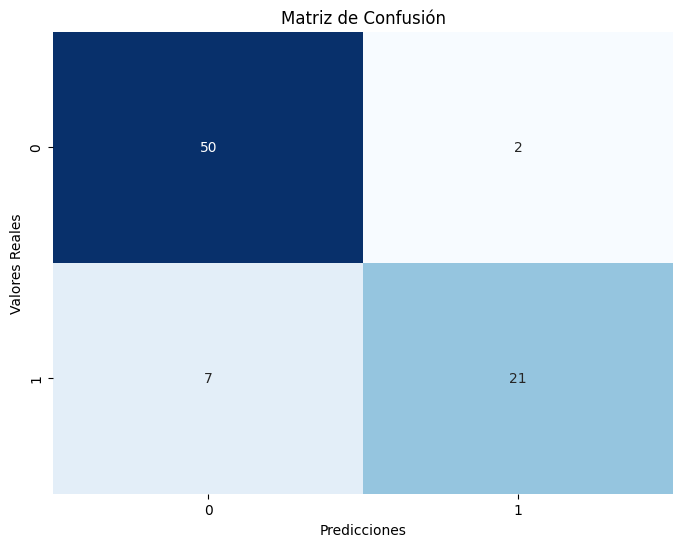

In [26]:
plt.figure(figsize=(8,6))
sbn.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()